In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
ship=pd.read_csv(r'C:\Users\DELL\Downloads\Titanic.csv')

In [3]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
ship.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
ship.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [7]:
ship['Age'].fillna(ship['Age'].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3904\1711074170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ship['Age'].fillna(ship['Age'].mean(),inplace=True)


In [8]:
ship.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
ship['Sex'] = ship['Sex'].apply(lambda x: 1 if x == 'male' else 0)
ship['Embarked'] = ship['Embarked'].apply(lambda x: 1 if x == 'C' else (2 if x == 'Q' else 3))

In [10]:
ship.info()
ship.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,2.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [11]:
baseline_accuracy = ship['Survived'].value_counts().max() / ship['Survived'].value_counts().sum()
print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.6161616161616161


In [12]:
X = ship.drop('Survived', axis=1)
y = ship['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=144)

In [13]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']], y_train)

LogisticRegression(max_iter=200)

In [14]:
logistic_model_2 = LogisticRegression(max_iter=200)
logistic_model_2.fit(X_train[['Pclass', 'Sex', 'Age', 'SibSp']], y_train)

LogisticRegression(max_iter=200)

In [15]:
predictTest = logistic_model_2.predict_proba(X_test[['Pclass', 'Sex', 'Age', 'SibSp']])[:, 1]

In [16]:
print(pd.Series(predictTest).describe())
print(pd.DataFrame({'Survived': y_test, 'PredictTest': predictTest}).groupby('Survived')['PredictTest'].mean())

count    268.000000
mean       0.378231
std        0.292245
min        0.021144
25%        0.110863
50%        0.270607
75%        0.603745
max        0.957238
dtype: float64
Survived
0    0.230107
1    0.611811
Name: PredictTest, dtype: float64


In [17]:
fpr, tpr, thresholds = roc_curve(y_test, predictTest)
roc_auc = auc(fpr, tpr)

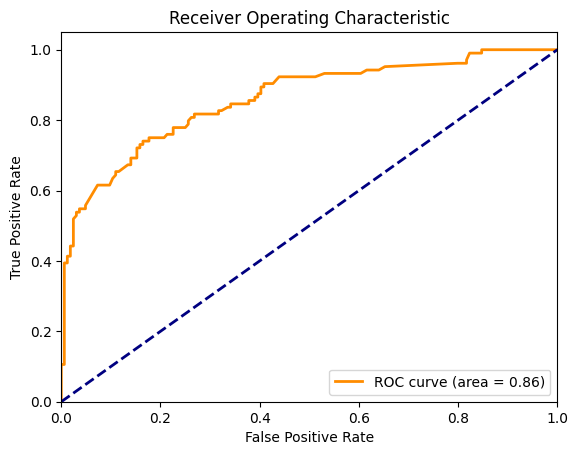

In [18]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

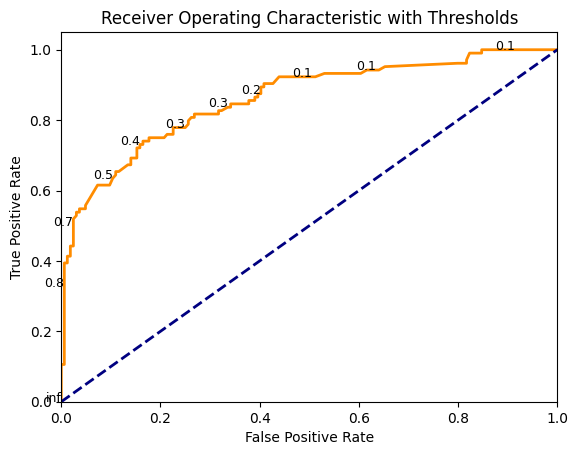

In [19]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
for i, threshold in enumerate(thresholds):
    if i % 10 == 0:
        plt.text(fpr[i], tpr[i], f'{threshold:.1f}', fontsize=9, ha='right')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Thresholds')
plt.show()

In [20]:
threshold = 0.3
conf_matrix = confusion_matrix(y_test, predictTest > threshold)

In [21]:
true_negatives_L = conf_matrix[0, 0]
false_positives_L = conf_matrix[0, 1]
false_negatives_L = conf_matrix[1, 0]
true_positives_L = conf_matrix[1, 1]

In [22]:
sensitivity_Log = true_positives_L / (true_positives_L + false_negatives_L)
specificity_Log = true_negatives_L / (true_negatives_L + false_positives_L)
accuracy_Log = (true_positives_L + true_negatives_L) / conf_matrix.sum()

In [23]:
print(f"Sensitivity: {sensitivity_Log}")
print(f"Specificity: {specificity_Log}")
print(f"Accuracy: {accuracy_Log}")

Sensitivity: 0.8173076923076923
Specificity: 0.7317073170731707
Accuracy: 0.7649253731343284


In [24]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)

DecisionTreeClassifier()

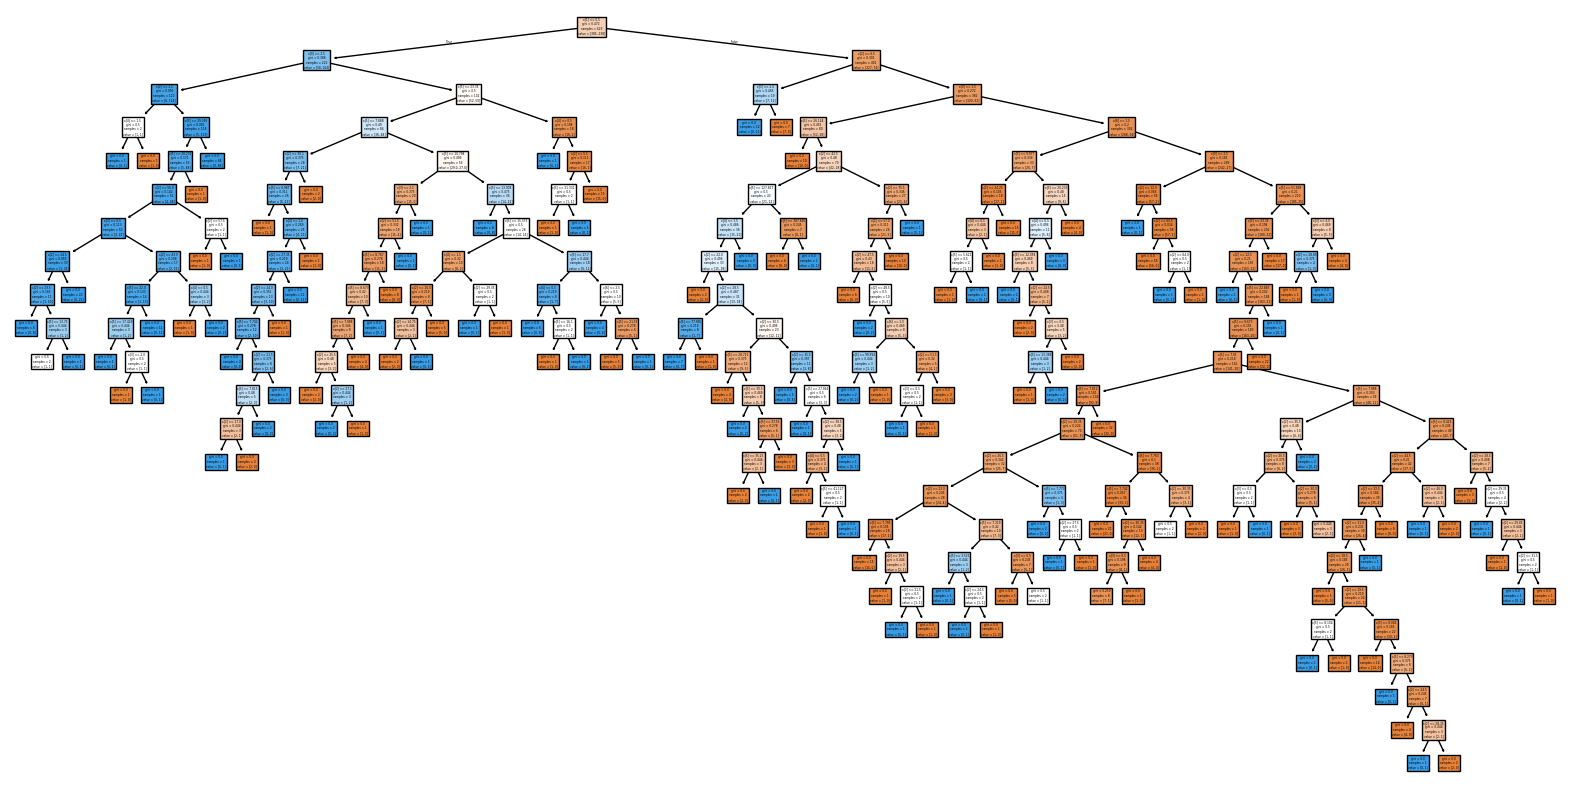

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(tree1, filled=True)
plt.show()

In [26]:
CARTpred = tree1.predict(X_test)
conf_matrix_cart = confusion_matrix(y_test, CARTpred)

In [27]:
true_negatives_C = conf_matrix_cart[0, 0]
false_positives_C = conf_matrix_cart[0, 1]
false_negatives_C = conf_matrix_cart[1, 0]
true_positives_C = conf_matrix_cart[1, 1]

In [28]:
sensitivity_C = true_positives_C / (true_positives_C + false_negatives_C)
specificity_C = true_negatives_C / (true_negatives_C + false_positives_C)
accuracy_C = (true_positives_C + true_negatives_C) / conf_matrix_cart.sum()

In [29]:
print(f"Sensitivity_C: {sensitivity_C}")
print(f"Specificity_C: {specificity_C}")
print(f"Accuracy_C: {accuracy_C}")

Sensitivity_C: 0.7019230769230769
Specificity_C: 0.8170731707317073
Accuracy_C: 0.7723880597014925


In [30]:
RanFor = RandomForestClassifier(random_state=1)
RanFor.fit(X_train, y_train)
variable_importance = RanFor.feature_importances_
print(variable_importance)
Forpred = RanFor.predict(X_test)

[0.0914135  0.26143361 0.25392324 0.05095014 0.04395989 0.25815029
 0.04016933]


In [31]:
conf_matrix_RF = confusion_matrix(y_test, Forpred)

In [32]:
sensitivity_RF = conf_matrix_RF[1, 1] / conf_matrix_RF[1].sum()
specificity_RF = conf_matrix_RF[0, 0] / conf_matrix_RF[0].sum()
accuracy_RF = conf_matrix_RF.diagonal().sum() / conf_matrix_RF.sum()

In [33]:
print(f"Sensitivity_RF: {sensitivity_RF}")
print(f"Specificity_RF: {specificity_RF}")
print(f"Accuracy_RF: {accuracy_RF}")

Sensitivity_RF: 0.7211538461538461
Specificity_RF: 0.8292682926829268
Accuracy_RF: 0.7873134328358209
